In [1]:
import pandas as pd 
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize 

In [54]:
TrainData=pd.read_excel(r"Data_Train.xlsx")

In [55]:
TrainData.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [56]:

L2=[]
for k in TrainData["Name"]:
    brandname=word_tokenize(k)
    L2.append(brandname[0])
TrainData["Brand"]=L2

In [57]:
Td=TrainData.sort_values("Brand")
Td=Td.drop(["Name"],axis=1)
Td.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
1221,Chennai,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1.35,Ambassador
3702,Delhi,2010,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,10.00,Audi
5561,Bangalore,2014,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,24.50,Audi
596,Kochi,2016,58953,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,24.22,Audi
1583,Kochi,2019,6773,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,72.94,Audi


In [58]:
Td.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
Brand                 0
dtype: int64

In [59]:
Td=Td[Td.Price>=1]

In [60]:
Td.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               34
Power                34
Seats                40
Price                 0
Brand                 0
dtype: int64

In [61]:
Td.describe()

,Year,Kilometers_Driven,Seats,Price
count,5942.000000,5.942000e+03,5902.000000,5942.000000
mean,2013.466678,5.836590e+04,5.283802,9.592269
std,3.125467,9.166966e+04,0.809998,11.215913
min,1998.000000,1.710000e+02,0.000000,1.000000
25%,2012.000000,3.369475e+04,5.000000,3.500000
50%,2014.000000,5.297550e+04,5.000000,5.700000
75%,2016.000000,7.240825e+04,5.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,160.000000


## **Calculating Mean and Assigning it to 'null bhp':**

In [62]:
Td2=Td
Td2=Td2.ffill(axis=0)
Td3=Td2
Td4=Td3[Td3.Power!="null bhp"]
#calculating mean
list_power=[]
for item in Td4.Power:
    mil=item.split(" ")
    y=float(mil[0])
    list_power.append(y)
Td4["Power_"]=list_power
y=Td4.Power_.mean()

# replacing mean on "null bhp"
power=[]
for item in Td2["Power"]:
    if item=="null bhp":
        power.append(str(y)+" bhp")
    else:
        power.append(item)
Td2["Power"]=power




C:\Users\shubh\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [63]:
Td =Td2

In [64]:
Td

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
1221,Chennai,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1.35,Ambassador
3702,Delhi,2010,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,10.00,Audi
5561,Bangalore,2014,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,24.50,Audi
596,Kochi,2016,58953,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,24.22,Audi
1583,Kochi,2019,6773,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,72.94,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...
4044,Ahmedabad,2011,173000,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,12.00,Volvo
3235,Ahmedabad,2015,34000,Diesel,Automatic,First,9.0 kmpl,1984 CC,181 bhp,5.0,20.00,Volvo
3727,Mumbai,2013,31000,Diesel,Automatic,First,13.2 kmpl,2400 CC,215 bhp,5.0,17.65,Volvo
4497,Kochi,2014,102001,Diesel,Automatic,First,11.1 kmpl,2400 CC,200 bhp,7.0,23.58,Volvo


#### <font color='green'>No Null Values. Now we move to Visual Analysis.</font>

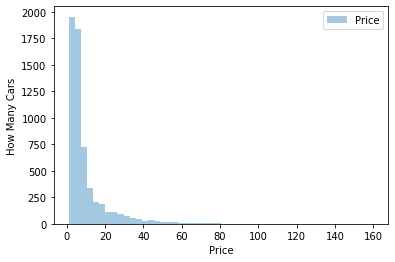

In [65]:
sbn.distplot(Td.Price,label="Price",kde=False)
plt.xlabel("Price")
plt.ylabel("How Many Cars")
plt.legend(labels=["Price"])
plt.show()

## Effect Of "Location" on Price of Cars:

In [66]:
L=Td.Location.unique()
print(L)

['Chennai' 'Delhi' 'Bangalore' 'Kochi' 'Hyderabad' 'Coimbatore' 'Pune'
 'Kolkata' 'Mumbai' 'Ahmedabad' 'Jaipur']


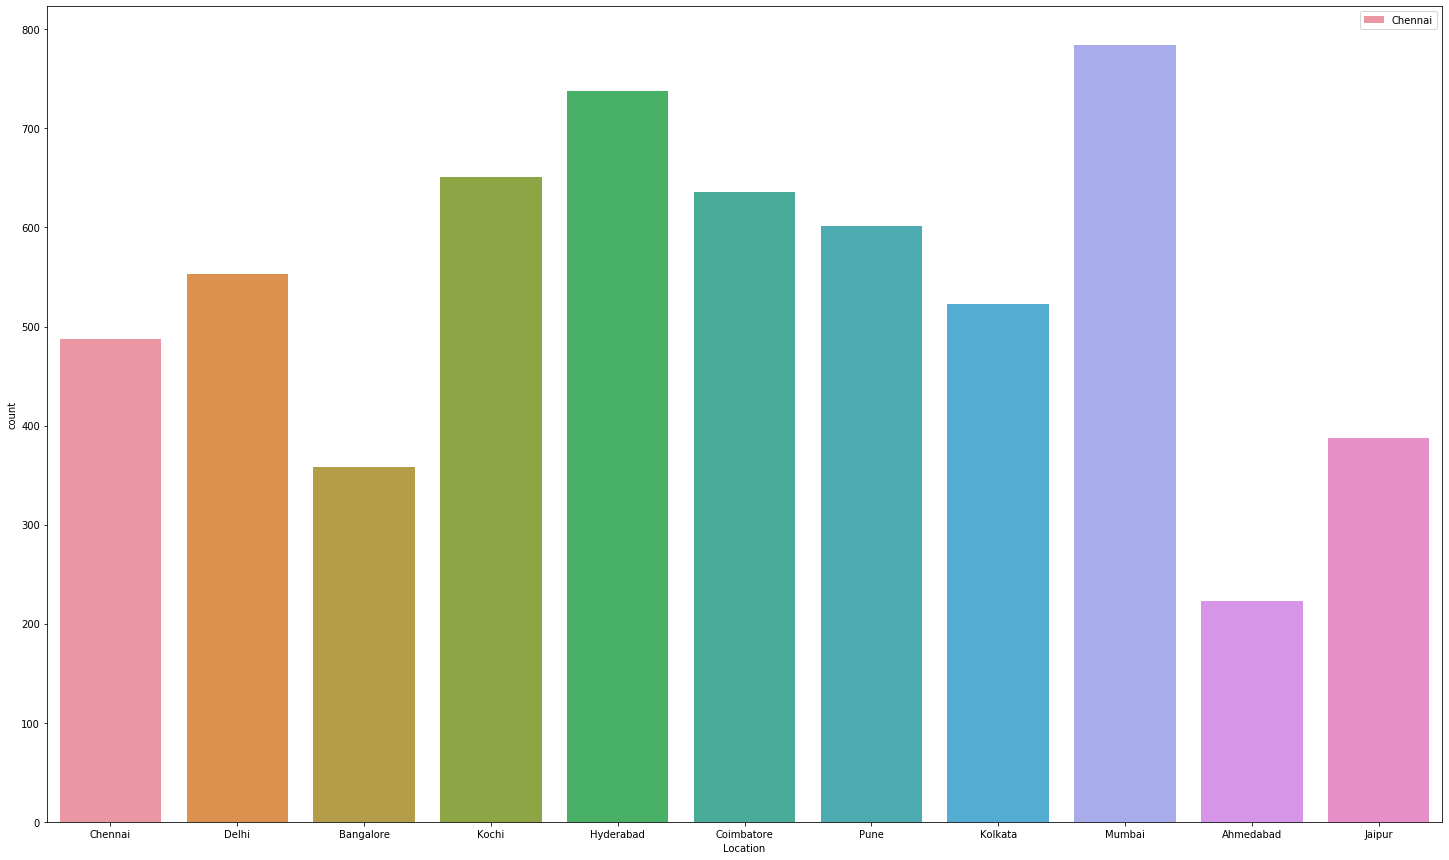

In [67]:
plt.figure(figsize=(25,15))
sbn.countplot(Td.Location)
plt.legend(labels=L)
plt.show()

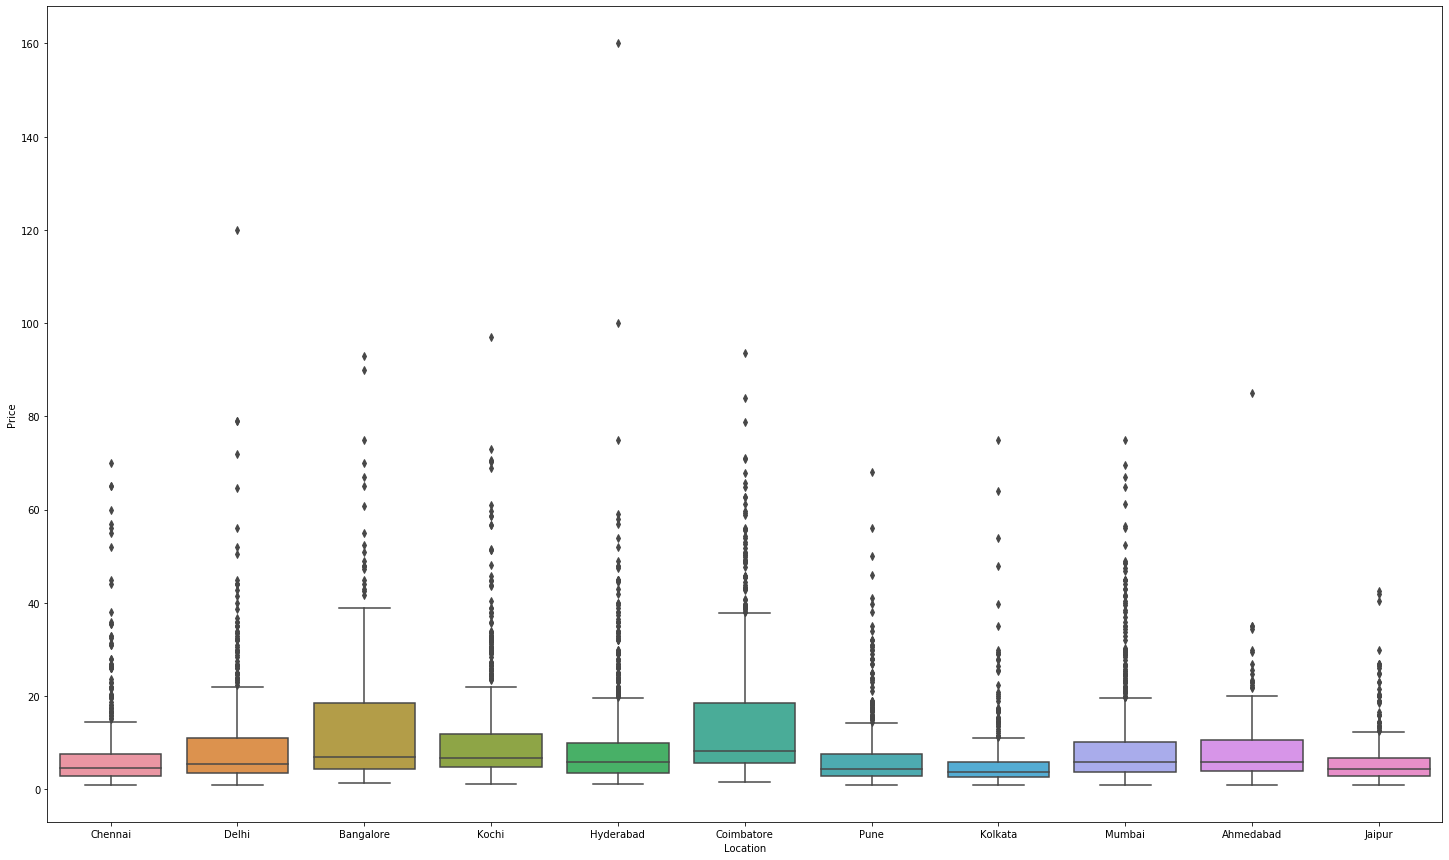

In [68]:
plt.figure(figsize=(25,15))
sbn.boxplot(x=Td.Location,y=Td.Price)


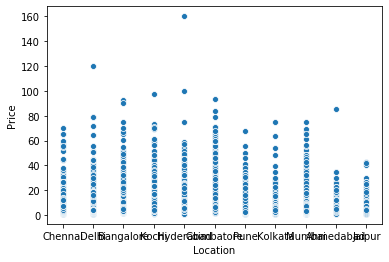

In [69]:
sbn.scatterplot(x=Td.Location,y=Td.Price)

#### <font color='green'>No particular pattern can be observed in the Price based on the Location.</font>
#### <font color='green'>Hence, Location doesn't affects the Price.</font>

In [70]:
Td=Td.drop(["Location"],axis=1)
Td.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
1221,2003,80000,Diesel,Manual,Third,12.8 kmpl,1489 CC,35.5 bhp,5.0,1.35,Ambassador
3702,2010,59000,Diesel,Automatic,First,16.55 kmpl,1968 CC,140 bhp,5.0,10.00,Audi
5561,2014,30000,Diesel,Automatic,First,14.94 kmpl,2967 CC,241.4 bhp,5.0,24.50,Audi
596,2016,58953,Petrol,Automatic,First,13.53 kmpl,1984 CC,177.01 bhp,5.0,24.22,Audi
1583,2019,6773,Diesel,Automatic,First,14.75 kmpl,2967 CC,245 bhp,7.0,72.94,Audi


## Effect of "Year" on Price of Car:

In [71]:
Td.Year.unique()

array([2003, 2010, 2014, 2016, 2019, 2012, 2015, 2009, 2008, 2011, 2013,
       2018, 2017, 2007, 2006, 2005, 2004, 2001, 2002, 2000, 1998],
      dtype=int64)

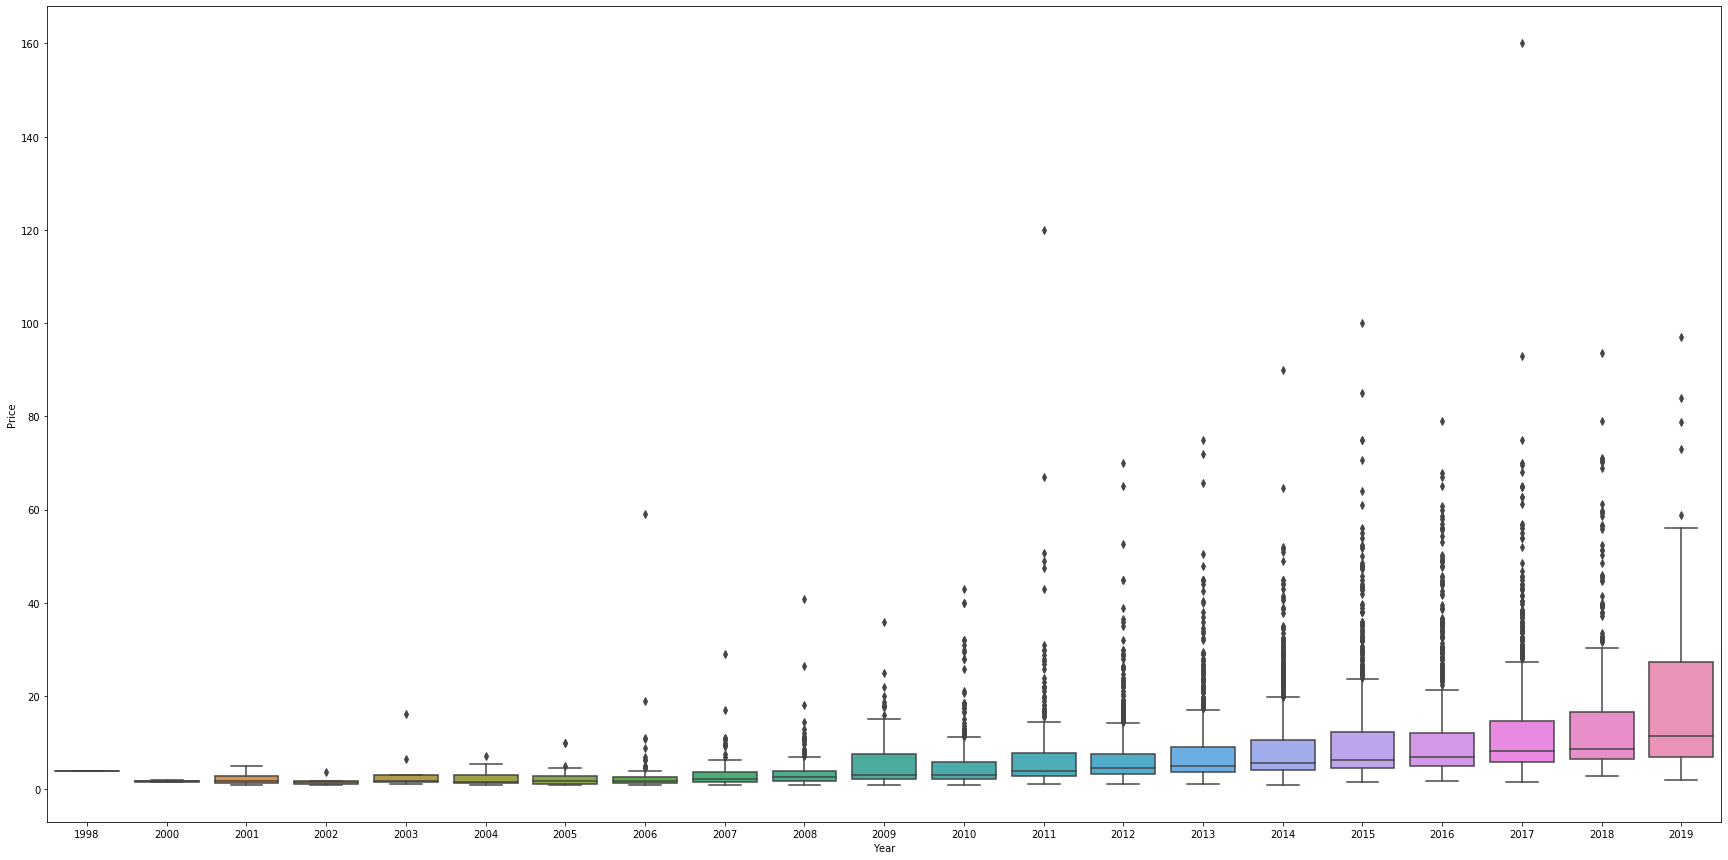

In [72]:
plt.figure(figsize=(30,15))
sbn.boxplot(x=Td.Year,y=Td.Price)

#### <font color='green'>It is evident that price increase with increase in years.</font>

## Effect of "Kilometers_Driven" on Price of Car:

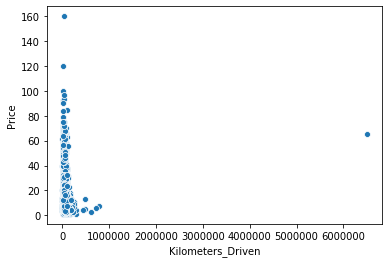

In [73]:
sbn.scatterplot(x=Td.Kilometers_Driven,y=Td.Price)

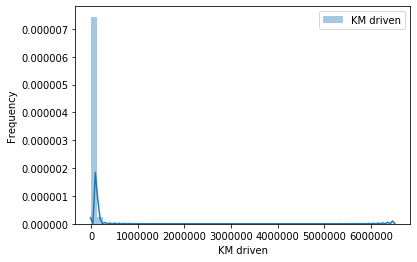

In [74]:
sbn.distplot(Td.Kilometers_Driven,label="KM driven",kde=True)
plt.xlabel("KM driven")
plt.ylabel("Frequency")
plt.legend(labels=["KM driven"])
plt.show()

#### <font color='green'>As the Number of Kilometers_Driven increases, the price decreases drastically</font>

## Effect of "Fuel_Type" on Price of Car:

In [75]:
Td.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG', 'Electric'], dtype=object)

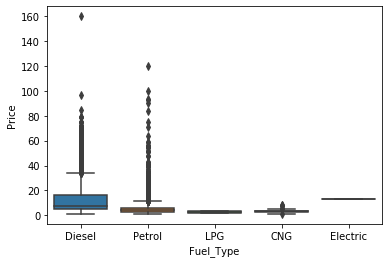

In [76]:
sbn.boxplot(x=Td.Fuel_Type,y=Td.Price)

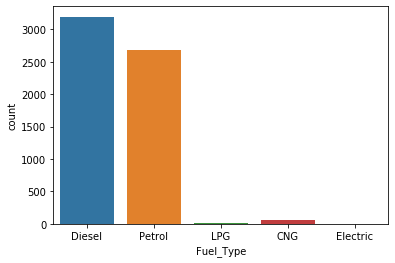

In [77]:
sbn.countplot(Td.Fuel_Type)

#### <font color='green'>It can be clearly seen that the cars with Fuel Type='Diesel' has more price.</font>

## Effect of "Transmission" on Price of Car:

In [78]:
Td.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

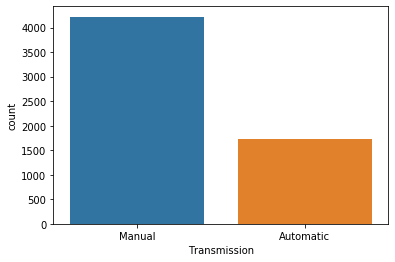

In [79]:
sbn.countplot(Td.Transmission)

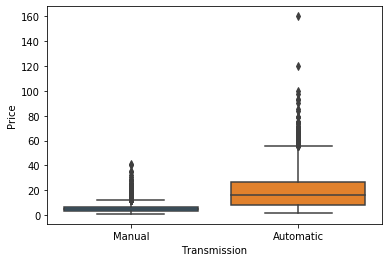

In [80]:
sbn.boxplot(x=Td.Transmission,y=Td.Price)

#### <font color='green'>cars with Transmission Type 'Automatic' has more price.</font>

## Effect of "Owner_Type" on Price of Car:

In [81]:
Td.Owner_Type.unique()

array(['Third', 'First', 'Second', 'Fourth & Above'], dtype=object)

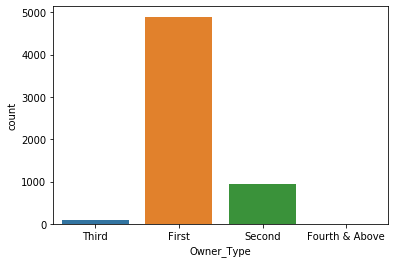

In [82]:
sbn.countplot(Td.Owner_Type)

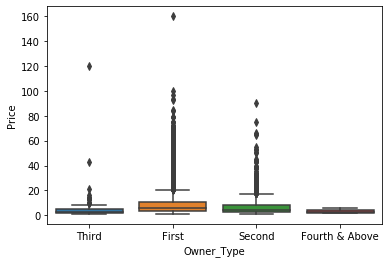

In [83]:
sbn.boxplot(x=Td.Owner_Type,y=Td.Price)

#### <font color='green'>Cars with Owner Type 'First' has highest prices followed by 'Second'.</font>

### Converting 'Mileage', 'Engine' & 'Power' to Float dataype:

In [84]:
Td3=Td
mileage=[]
engine=[]
power=[]
for i in Td3.Mileage:
    x=i.split(" ")
    y=float(x[0])
    mileage.append(y)
Td3["Mileage"]=mileage

for i in Td3.Engine:
    x=i.split(" ")
    y=float(x[0])
    engine.append(y)
Td3["Engine"]=engine

for i in Td3.Power:
    x=i.split(" ")
    y=float(x[0])
    power.append(y)
Td3["Power"]=power

In [85]:
PriceDf=Td3.Price

## Effect of "Mileage" on Price of Car:

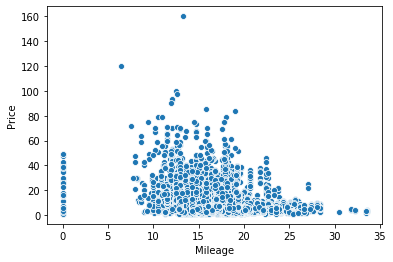

In [86]:
sbn.scatterplot(x=Td3.Mileage,y=Td3.Price)

#### <font color='green'>Price seems to be decreasing as Mileage increases.</font>

## Effect of "Engine" on Price of Car:

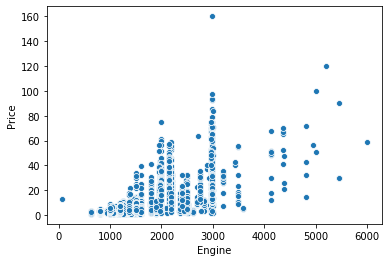

In [87]:
sbn.scatterplot(x=Td3.Engine,y=Td3.Price)

#### <font color='green'>Price seems to be increasing as 'Engine capacity' increases.</font>

## Effect of "Power" on Price of Car:

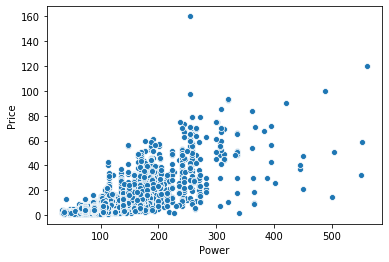

In [88]:
sbn.scatterplot(x=Td3.Power,y=Td3.Price)

## Effect of "No. of Seats" on Price of Car:

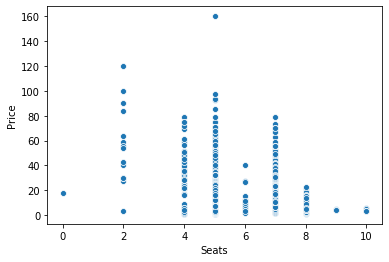

In [89]:
sbn.scatterplot(x=Td3.Seats,y=Td3.Price)

## Effect of "Brand" on Price of Car:

In [90]:
Td3.Brand.unique()

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

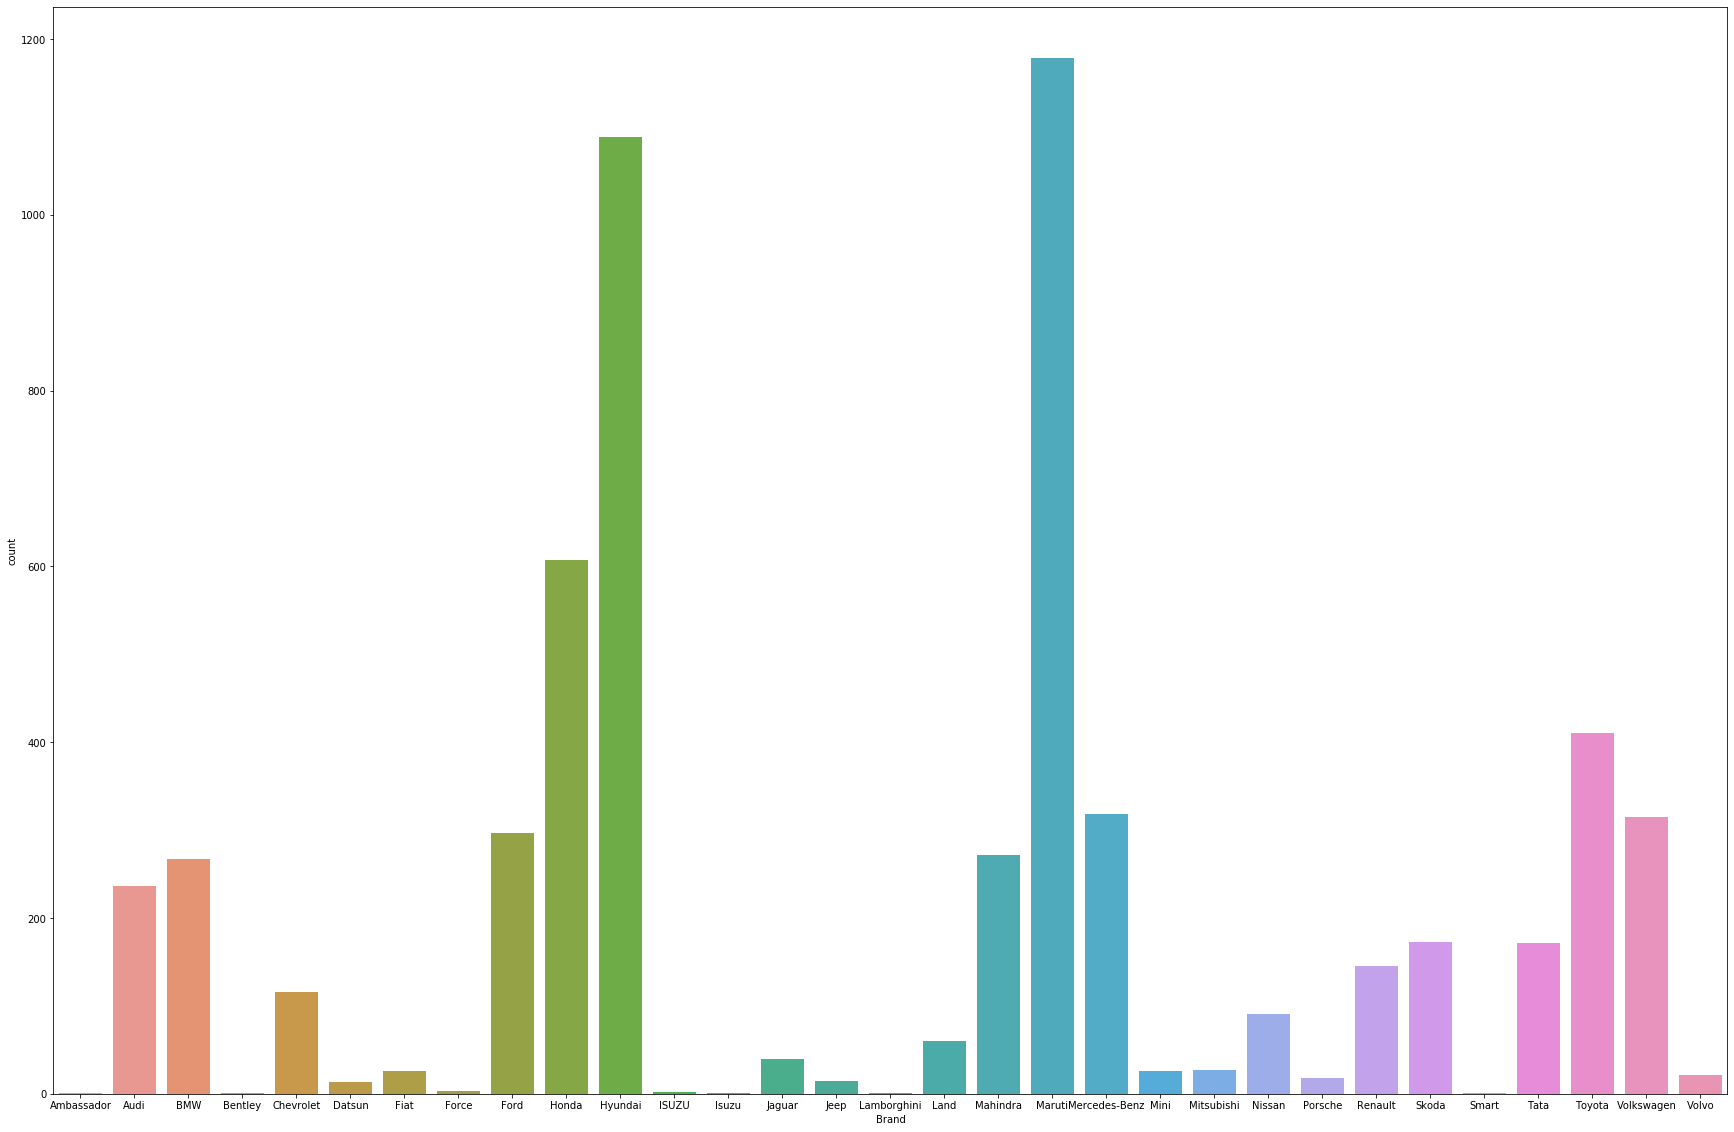

In [91]:
plt.figure(figsize=(30,20))
sbn.countplot(Td3.Brand)

#### <font color='green'>Here Maximum no. of cars belong to "Hyundai" & "Maruti" Brand.</font>

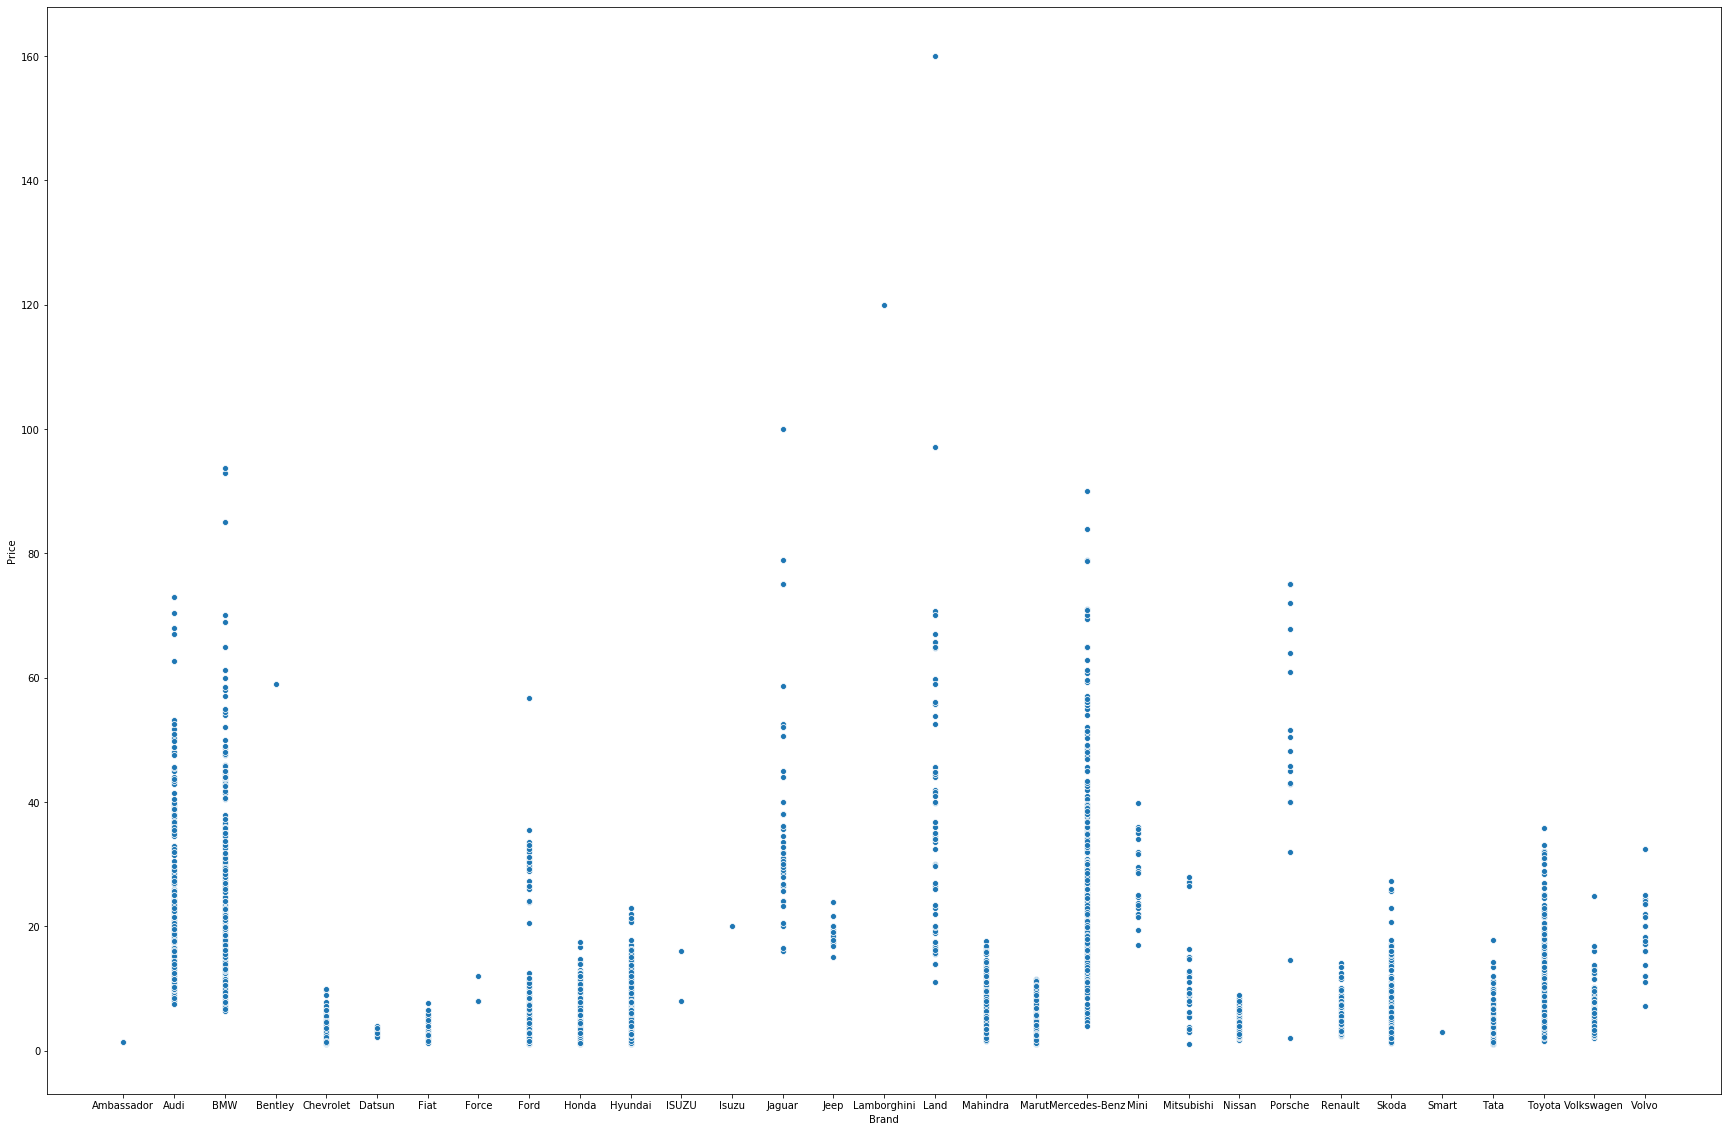

In [92]:
plt.figure(figsize=(30,20))
sbn.scatterplot(x=Td3.Brand,y=Td3.Price)

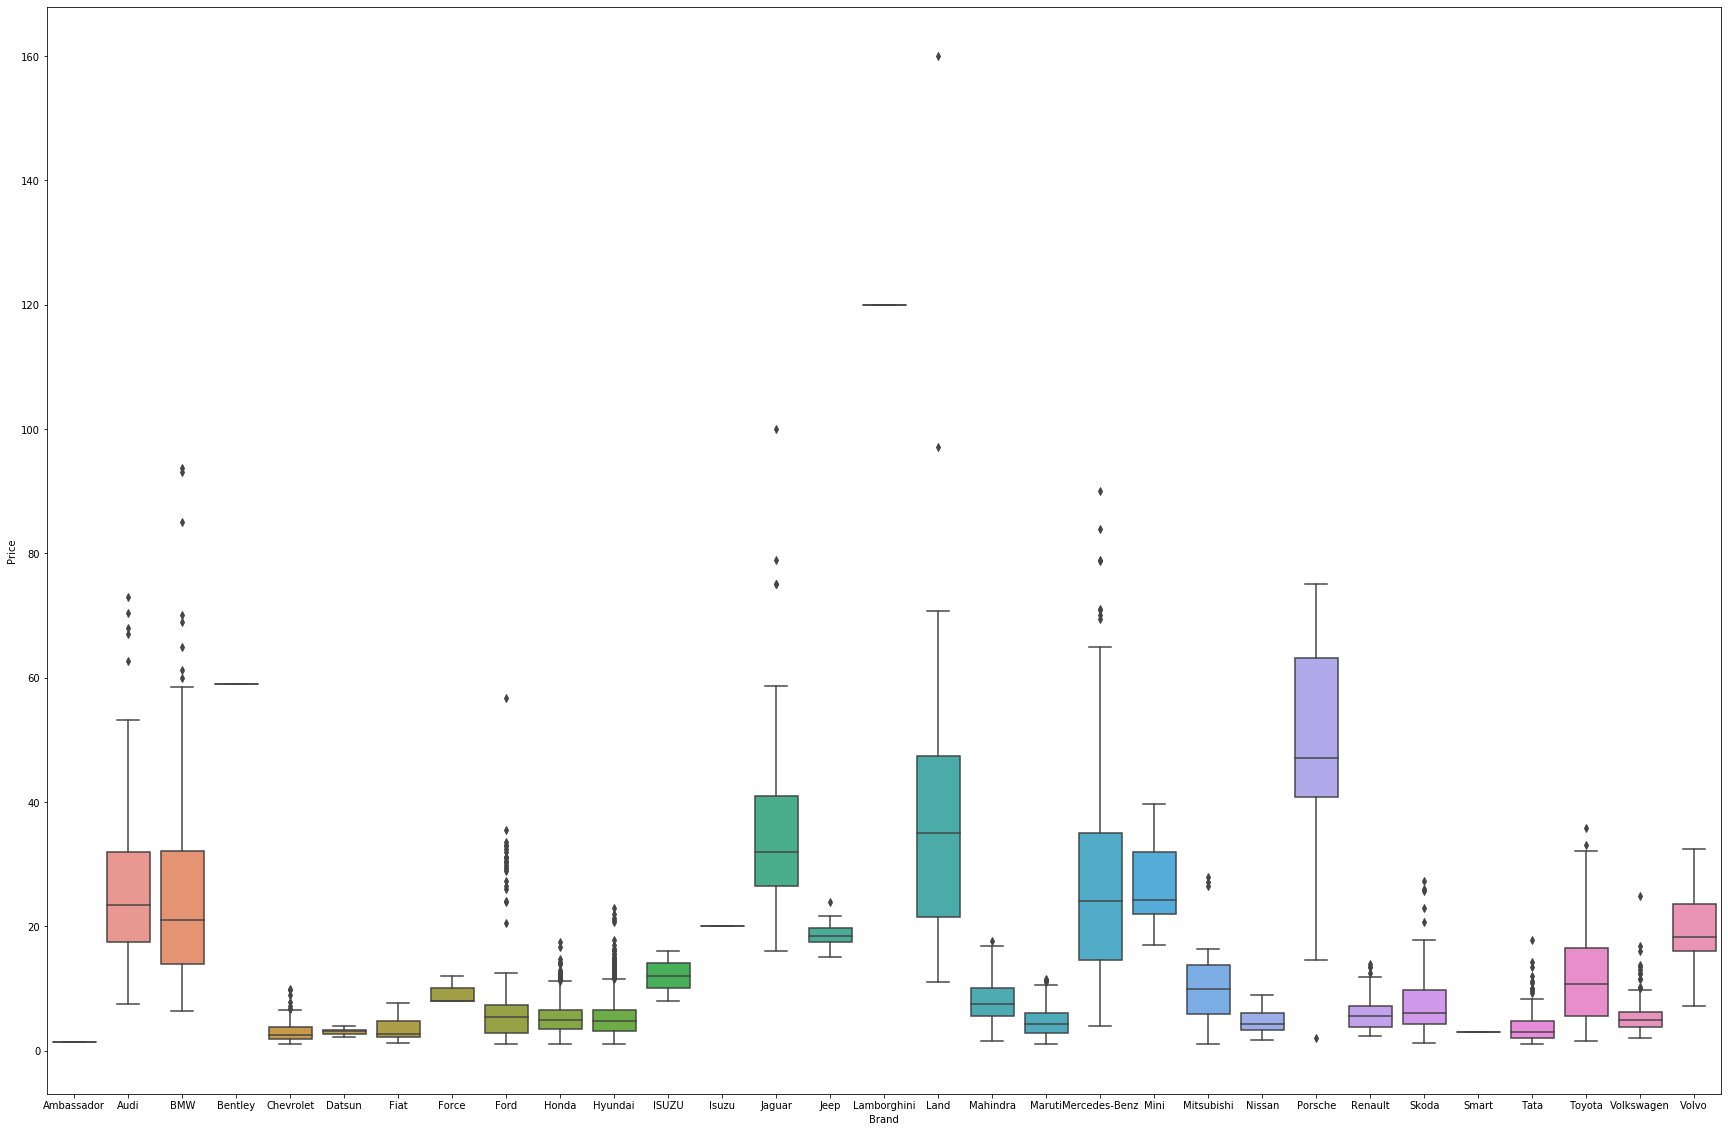

In [93]:
plt.figure(figsize=(30,20))
sbn.boxplot(x=Td3.Brand,y=Td3.Price)

In [95]:
d=pd.get_dummies(Td3.Fuel_Type)
Td3=pd.concat([Td3,d],axis=1)
d=pd.get_dummies(Td3.Transmission)
Td3=pd.concat([Td3,d],axis=1)
d=pd.get_dummies(Td3.Owner_Type)
Td3=pd.concat([Td3,d],axis=1)
d=pd.get_dummies(Td3.Brand)
Td3=pd.concat([Td3,d],axis=1)
Td3=Td3.drop(["Fuel_Type","Transmission","Owner_Type","Brand","Price","Power"],axis=1)

### Checking For Duplicated Columns (Keeping Unique Ones):

In [96]:
Td3.columns.duplicated()
outcome=[]
for i in Td3.columns.duplicated():
    if i==True:
        outcome.append(False)
    else:
        outcome.append(True)
Res=np.array(outcome)
Td3=Td3.loc[:,Res]
FinalDf=Td3

In [97]:
FinalDf.head()

,Year,Kilometers_Driven,Mileage,Engine,Seats,CNG,Diesel,Electric,LPG,Petrol,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
1221,2003,80000,12.80,1489.0,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3702,2010,59000,16.55,1968.0,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5561,2014,30000,14.94,2967.0,5.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,2016,58953,13.53,1984.0,5.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1583,2019,6773,14.75,2967.0,7.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Training & Model:

In [98]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn import metrics
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
X_TrainData,X_TestData,Y_TrainData,Y_TestData=train_test_split(FinalDf,PriceDf,test_size=0.3,random_state=0)

## Linear Regression :

In [99]:
lin_reg=linear_model.LinearRegression()
lin_reg.fit(X_TrainData,Y_TrainData)
lin_reg_predict=lin_reg.predict(X_TestData)
print("Coefficents:\n",lin_reg.coef_,"\nIntercept:\n",lin_reg.intercept_)
print('MSE (Mean Squared Error) :', metrics.mean_squared_error(Y_TestData, lin_reg_predict))  
print('RMSE (Root Mean Squared Error) :', np.sqrt(metrics.mean_squared_error(Y_TestData, lin_reg_predict)))
print('MAE (Mean Absolute Error) :', metrics.mean_absolute_error(Y_TestData, lin_reg_predict))  
print("r2_score : ",metrics.r2_score(Y_TestData,lin_reg_predict))

Coefficents:
 [ 1.19799193e+00  3.00094446e-06 -1.65517795e-01  7.43817733e-03
 -6.10393639e-01 -2.71393124e+00 -2.25556586e+00  8.32198406e+00
 -5.99859141e-01 -2.75262783e+00  4.16353934e-01 -4.16353934e-01
 -9.60398586e-04  2.53419773e-01 -2.60645646e-01  8.18627139e-03
  1.25560542e+00  6.66069843e+00  6.96770486e+00  2.02368506e+01
 -5.18348893e+00 -6.83458613e+00 -5.20697359e+00 -8.51870440e+00
 -5.07957304e+00 -5.44188904e+00 -4.72513185e+00 -1.28179760e+01
 -3.55271368e-15  1.55331802e+01 -1.62237571e+00 -3.55271368e-15
  2.10830700e+01 -7.89345365e+00 -3.93619836e+00  6.68688915e+00
  1.11200811e+01 -6.45649879e+00 -5.94950427e+00  1.92819330e+01
 -5.55238308e+00 -5.49212830e+00 -2.53471825e+00 -6.54187749e+00
 -5.53947891e+00 -5.95448987e+00  2.45541695e+00] 
Intercept:
 -2402.9646382678243
MSE (Mean Squared Error) : 35.967284958081706
RMSE (Root Mean Squared Error) : 5.997273126853712
MAE (Mean Absolute Error) : 3.249209926503054
r2_score :  0.7235883034205166


## KNN:

In [100]:
RMSE= []
for i in range(30):
    i = i+1
    classifier = neighbors.KNeighborsRegressor(n_neighbors = i)
    classifier.fit(X_TrainData, Y_TrainData)
    Prediction=classifier.predict(X_TestData) 
    Err = sqrt(mean_squared_error(Y_TestData,Prediction))
    RMSE.append(Err) 
    print('RMSE value for k= ' , i , 'is:', Err)

RMSE value for k=  1 is: 8.547016321369497
RMSE value for k=  2 is: 7.414429566866157
RMSE value for k=  3 is: 7.402358606770497
RMSE value for k=  4 is: 7.502242765012865
RMSE value for k=  5 is: 7.567995551270452
RMSE value for k=  6 is: 7.608962652198393
RMSE value for k=  7 is: 7.669309479178517
RMSE value for k=  8 is: 7.75395292261358
RMSE value for k=  9 is: 7.765055212618299
RMSE value for k=  10 is: 7.875503875163629
RMSE value for k=  11 is: 7.9266566521816015
RMSE value for k=  12 is: 7.9336884893750215
RMSE value for k=  13 is: 7.957988631553301
RMSE value for k=  14 is: 7.992498751187189
RMSE value for k=  15 is: 8.05451431807691
RMSE value for k=  16 is: 8.125760751277307
RMSE value for k=  17 is: 8.158549214399205
RMSE value for k=  18 is: 8.204671795146927
RMSE value for k=  19 is: 8.250335414564155
RMSE value for k=  20 is: 8.286787772274957
RMSE value for k=  21 is: 8.337281381500173
RMSE value for k=  22 is: 8.37566878609329
RMSE value for k=  23 is: 8.41586209470114

## Random Forest Model:

In [104]:
Enc = preprocessing.LabelEncoder()
training_scores_encoded = Enc.fit_transform(Y_TrainData)
Rfm = RandomForestClassifier(random_state=0,n_jobs=1,max_depth=1000, n_estimators=100)
Rfm.fit(X_TrainData,training_scores_encoded)
TargetPred = Rfm.predict(X_TestData)
TargetPred = Enc.inverse_transform(TargetPred)
Result = Enc.fit_transform(Y_TestData)
print('MAE (Mean Absolute Error) :', metrics.mean_absolute_error(Y_TestData,TargetPred))  
print('MSE (Mean Squared Error) :', metrics.mean_squared_error(Y_TestData,TargetPred))  
print('RMSE (Root Mean Squared Error) :', np.sqrt(metrics.mean_squared_error(Y_TestData,TargetPred)))
print("r2_score : ",metrics.r2_score(Y_TestData,TargetPred))

MAE (Mean Absolute Error) : 2.089063376332025
MSE (Mean Squared Error) : 24.297153785754347
RMSE (Root Mean Squared Error) : 4.92921431728773
r2_score :  0.8132742711105327


## SVM:

In [50]:
Enc = preprocessing.LabelEncoder()
training_scores_encoded = Enc.fit_transform(Y_TrainData)
classifier = LinearSVC(random_state=0, tol=2000)
classifier.fit(X_TrainData, training_scores_encoded)
TargetPred = classifier.predict(X_TestData)
TargetPred = Enc.inverse_transform(TargetPred)
Result = Enc.fit_transform(Y_TestData)
print('MAE (Mean Absolute Error) :', metrics.mean_absolute_error(Y_TestData,TargetPred))  
print('MSE (Mean Squared Error) :', metrics.mean_squared_error(Y_TestData,TargetPred))  
print('RMSE (Root Mean Squared Error) :', np.sqrt(metrics.mean_squared_error(Y_TestData,TargetPred)))
print("r2_score : ",metrics.r2_score(Y_TestData,TargetPred))

MAE (Mean Absolute Error) : 6.524374649467189
MSE (Mean Squared Error) : 152.12798272574312
RMSE (Root Mean Squared Error) : 12.33401729874509
r2_score :  -0.169116708460046


## Testing Model :

In [122]:
TestDf=pd.read_excel(r"Data_Test.xlsx")

from nltk.tokenize import word_tokenize
from sklearn import preprocessing
Enc = preprocessing.LabelEncoder()

l=[]
for name in TestDf["Name"]:
    brand=word_tokenize(name)
    l.append(brand[0])
TestDf["Brand"]=l

TestDf1=TestDf.sort_values("Brand")
TestDf1=TestDf1.drop(["Name"],axis=1)

TestDf1.isnull().sum()

TestDf1=TestDf1.ffill(axis=0)
TestDf2=TestDf1[TestDf1.Engine!="null CC"]
TestDf3=TestDf2[TestDf2.Power!="null bhp"]

engine=[]
for i in TestDf3.Engine:
    mil=i.split(" ")
    y=int(mil[0])
    engine.append(y)
TestDf3["Engine"]=engine

power=[]
for i in TestDf3.Power:
    mil=i.split(" ")
    y=float(mil[0])
    power.append(y)
TestDf3["Power"]=power

x=TestDf3.Engine.mean()
y=TestDf3.Power.mean()

engine=[]
for i in TestDf1["Engine"]:
    if i=="null CC":
        engine.append(str(x)+" CC")
    else:
        engine.append(i)
TestDf1["Engine"]=engine
power=[]
for i in TestDf1["Power"]:
    if i=="null bhp":
        power.append(str(y)+" bhp")
    else:
        power.append(i)
TestDf1["Power"]=power


mileage=[]
for i in TestDf1.Mileage:
    mil=i.split(" ")
    y=float(mil[0])
    mileage.append(y)
TestDf1["Mileage"]=mileage

engine=[]
for i in TestDf1.Engine:
    mil=i.split(" ")
    y=int(mil[0])
    engine.append(y)
TestDf1["Engine"]=engine

power=[]
for i in TestDf1.Power:
    mil=i.split(" ")
    y=float(mil[0])
    power.append(y)
TestDf1["Power"]=power

TestDf1=TestDf1.drop(["Power"],axis=1)

TestDf1=TestDf1.drop(["Location"],axis=1)

Dm=pd.get_dummies(TestDf1.Fuel_Type)
TestDf1=pd.concat([TestDf1,Dm],axis=1)
electric=[]
i=0
while i<1234:
    electric.append(0)
    i+=1
TestDf1["Electric"]=electric

Dm=pd.get_dummies(TestDf1.Transmission)
TestDf1=pd.concat([TestDf1,Dm],axis=1)

Dm=pd.get_dummies(TestDf1.Owner_Type)
TestDf1=pd.concat([TestDf1,Dm],axis=1)

TestDf1=TestDf1.drop(["Fuel_Type","Transmission","Owner_Type"],axis=1)

brand1=list(TestDf1.Brand)
brand=['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda','Smart', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']

for i in brand:
    brand=[]
    for z in brand1:
        if i==z:
            brand.append(1)
        else:
            brand.append(0)
    TestDf1[i]=brand

TestDf1=TestDf1.drop(["Brand"],axis=1)

Enc = preprocessing.LabelEncoder()

Y_pred= classifier.predict(TestDf1)
print("THE PREDICTED PRICES ARE :-")
Y_pred




C:\Users\shubh\anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\shubh\anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


THE PREDICTED PRICES ARE :-


array([ 6.465     , 11.25833333, 11.39766667, ...,  5.511     ,
       23.769     , 11.398     ])